In [ ]:
import osmnx

In [2]:
query = "Jericho, Oxford, UK"
lat, lon = osmnx.geocoder.geocode(query)
f"The centre of {query} is around latitude {lat} longitude {lon}"

'The centre of Jericho, Oxford, UK is around latitude 51.7587059 longitude -1.2681711'

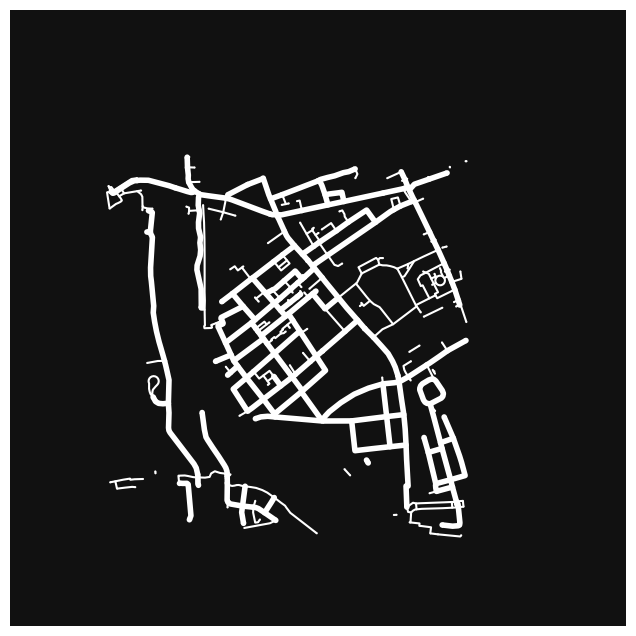

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
G = osmnx.graph.graph_from_point((lat, lon), 500, network_type="walk", retain_all=True)
osmnx.plot.plot_figure_ground(G)